1 - Data Collection
2 - Some Visualizations and Descriptive Statistics
3 - Data cleanup (handling missing values, duplicates, errors, outliers)
3b - Maybe some visualizations again for correlations, heatmaps etc.
4 - Feature creations/ Feature selection (if you change or add new features or drop a few features)
5 - Data Visualization (not necessary for everything, but as a validation that data is ready to be modeled)
6 - All data in a single data frame
7 - Train/Test Split
8 - Train the model using training data
9 - Training accuracy - Does the model overfit?
10 - Provide the model with Test[x] only (not y values).
11 - Prediction/ test accuracy

<h1>Data Collection</h1>

Import libraries and CSV.

In [1]:
#import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

video_data = pd.read_csv('CAvideos.csv',parse_dates=[5] ,index_col=0)
video_data.index.names = [None]
video_data['trending_date'] = pd.to_datetime(video_data['trending_date'], format='%y.%d.%m')
video_data['category_id'] = video_data.category_id.astype('category')
video_data['publish_month'] = video_data.publish_time.dt.month
video_data['publish_month'] = video_data.publish_month.astype('category')
display(video_data)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,11
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,11
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,11
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,6
8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,6
GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,6
lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,6


<h1>Data Cleaning</h1>

Count rows with null values and group by column.

In [2]:
video_data.isnull().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
publish_month                0
dtype: int64

Drop rows with null values.

In [3]:
video_data.dropna(inplace=True)

display(video_data)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,11
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,11
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,11
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,6
8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,6
GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,6
lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,6


Drop videos with disabled ratings or comments. <br> 
Drop irrelevant columns.

In [4]:
video_data = video_data[(video_data['comments_disabled']==False) & (video_data['ratings_disabled']==False) & (video_data['video_error_or_removed']==False)]

video_data.drop(columns=['comments_disabled','thumbnail_link','ratings_disabled','video_error_or_removed'],inplace=True)

Add trending day count column. Counts duplicates and assigns to new column. Each entry in CSV represents a single day a video was trending.

In [5]:
video_data['trending day count'] = video_data.groupby(video_data.index).size()

video_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_month,trending day count
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,11,4
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,11,5
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,4
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,11,4
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,6,1
8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,► Retrouvez vos programmes préférés : https://...,6,1
GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,Find out more about Kingdom Hearts 3: https://...,6,3
lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,Peter Navarro isn’t talking so tough now. Ana ...,6,1


Drop rows with duplicate indices.

In [6]:
video_data = video_data[~video_data.index.duplicated()]
video_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_month,trending day count
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,11,4
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,11,5
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,4
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,11,4
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7E1np354AEc,2018-06-14,Вечер с Владимиром Соловьевым от 13.06.2018,Россия 24,24,2018-06-13 23:53:29+00:00,"поединок|""михеев""|""полный контакт""|""вечер с вл...",201847,1568,407,537,Вечер с Владимиром Соловьевым от 13.06.2018\rП...,6,1
sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,6,1
8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,► Retrouvez vos programmes préférés : https://...,6,1
lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,Peter Navarro isn’t talking so tough now. Ana ...,6,1


Check column types.

In [7]:
video_data.dtypes

trending_date              datetime64[ns]
title                              object
channel_title                      object
category_id                      category
publish_time          datetime64[ns, UTC]
tags                               object
views                               int64
likes                               int64
dislikes                            int64
comment_count                       int64
description                        object
publish_month                    category
trending day count                  int64
dtype: object

Add column to capture number of tags.<br>
Add column for participation rate. (comments / likes)<br>
Delete entries with 0% participation rate.

In [8]:
video_data.insert(loc=video_data.shape[1], column='tag count', value=[0 for i in range(video_data.shape[0])])

video_data.insert(loc=video_data.shape[1], column='participation %', value=video_data.comment_count/video_data.views*100)

video_data = video_data[~(video_data['participation %'] == 0)] 

display(video_data)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_month,trending day count,tag count,participation %
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,11,4,0,0.733639
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,11,5,0,1.284185
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,4,0,0.256342
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,11,4,0,0.835851
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,11,2,0,0.253752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7E1np354AEc,2018-06-14,Вечер с Владимиром Соловьевым от 13.06.2018,Россия 24,24,2018-06-13 23:53:29+00:00,"поединок|""михеев""|""полный контакт""|""вечер с вл...",201847,1568,407,537,Вечер с Владимиром Соловьевым от 13.06.2018\rП...,6,1,0,0.266043
sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,6,1,0,1.626077
8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,► Retrouvez vos programmes préférés : https://...,6,1,0,0.049352
lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,Peter Navarro isn’t talking so tough now. Ana ...,6,1,0,1.451074


Count tags and assign to column 'tag count'.<br>
Remove apostrophes from tags.<br>
Drop rows with non english characters in tags. Helps remove foreign language videos for easier analysis.

In [9]:
for i, row in video_data.iterrows():
    
    video_data.loc[i, 'tag count'] = len(row['tags'].split('|'))
    video_data.loc[i, 'tags'] = video_data.loc[i, 'tags'].replace('"', '')
    
    if(not row['tags'].isascii()):
        video_data.drop(index=i,inplace=True)
        
display(video_data)

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_month,trending day count,tag count,participation %
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,Eminem|Walk|On|Water|Aftermath/Shady/Interscop...,17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,11,4,6,0.733639
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,plush|bad unboxing|unboxing|fan mail|idubbbztv...,1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,11,5,11,1.284185
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,racist superman|rudy|mancuso|king|bach|racist|...,3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,4,23,0.256342
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,2095828,132239,1989,17518,I know it's been a while since we did this sho...,11,4,14,0.835851
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,edsheeran|ed sheeran|acoustic|live|cover|offic...,33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,11,2,10,0.253752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxbkfmYFxnw,2018-06-14,Hawaii volcano update: INCREDIBLE aerial pictu...,Military Update,20,2018-06-13 20:00:51+00:00,Hawaii volcano update|Hawaii volcano|United St...,104279,718,94,218,Military update news : Hawaii volcano update: ...,6,1,40,0.209055
sbxP1ndw2ds,2018-06-14,Eid Makeup Look: Heavy Glam with Bronze Eyesha...,Chloe Morello,26,2018-06-13 07:01:53+00:00,australian|blogger|vlogger|blog|vlog|guru|girl...,168717,16278,165,1702,"Hi all / Hala Wallah,Another Eid look, this ti...",6,1,46,1.008790
FoOi-oTaIEU,2018-06-14,Ultimate Safari Adventure!,Brave Wilderness,15,2018-06-13 11:00:03+00:00,wild|minecraft ocelot|ocelot minecraft|adventu...,182184,9710,128,1647,Please SUBSCRIBE - http://bit.ly/BWchannelTour...,6,1,39,0.904031
sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,annoying orange|funny|fruit|talking|animation|...,80685,1701,99,1312,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,6,1,21,1.626077


In [10]:
video_data.describe()

,views,likes,dislikes,comment_count,trending day count,tag count,participation %
count,1.876000e+04,1.876000e+04,18760.000000,18760.000000,18760.000000,18760.000000,18760.000000
mean,5.016984e+05,1.925773e+04,723.813220,2761.870256,1.740778,19.232090,0.688439
std,1.069542e+06,5.019178e+04,3394.565877,8111.767602,1.059467,12.044645,0.895904
min,1.023000e+03,2.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000028
25%,1.087402e+05,1.927000e+03,75.000000,366.000000,1.000000,10.000000,0.201257
50%,2.421310e+05,6.129500e+03,194.000000,1013.000000,1.000000,19.000000,0.460685
75%,5.173745e+05,1.737325e+04,509.000000,2515.250000,2.000000,28.000000,0.861173
max,3.773628e+07,1.735931e+06,167908.000000,363153.000000,8.000000,81.000000,30.460041


<h1>Visualizations</h1>

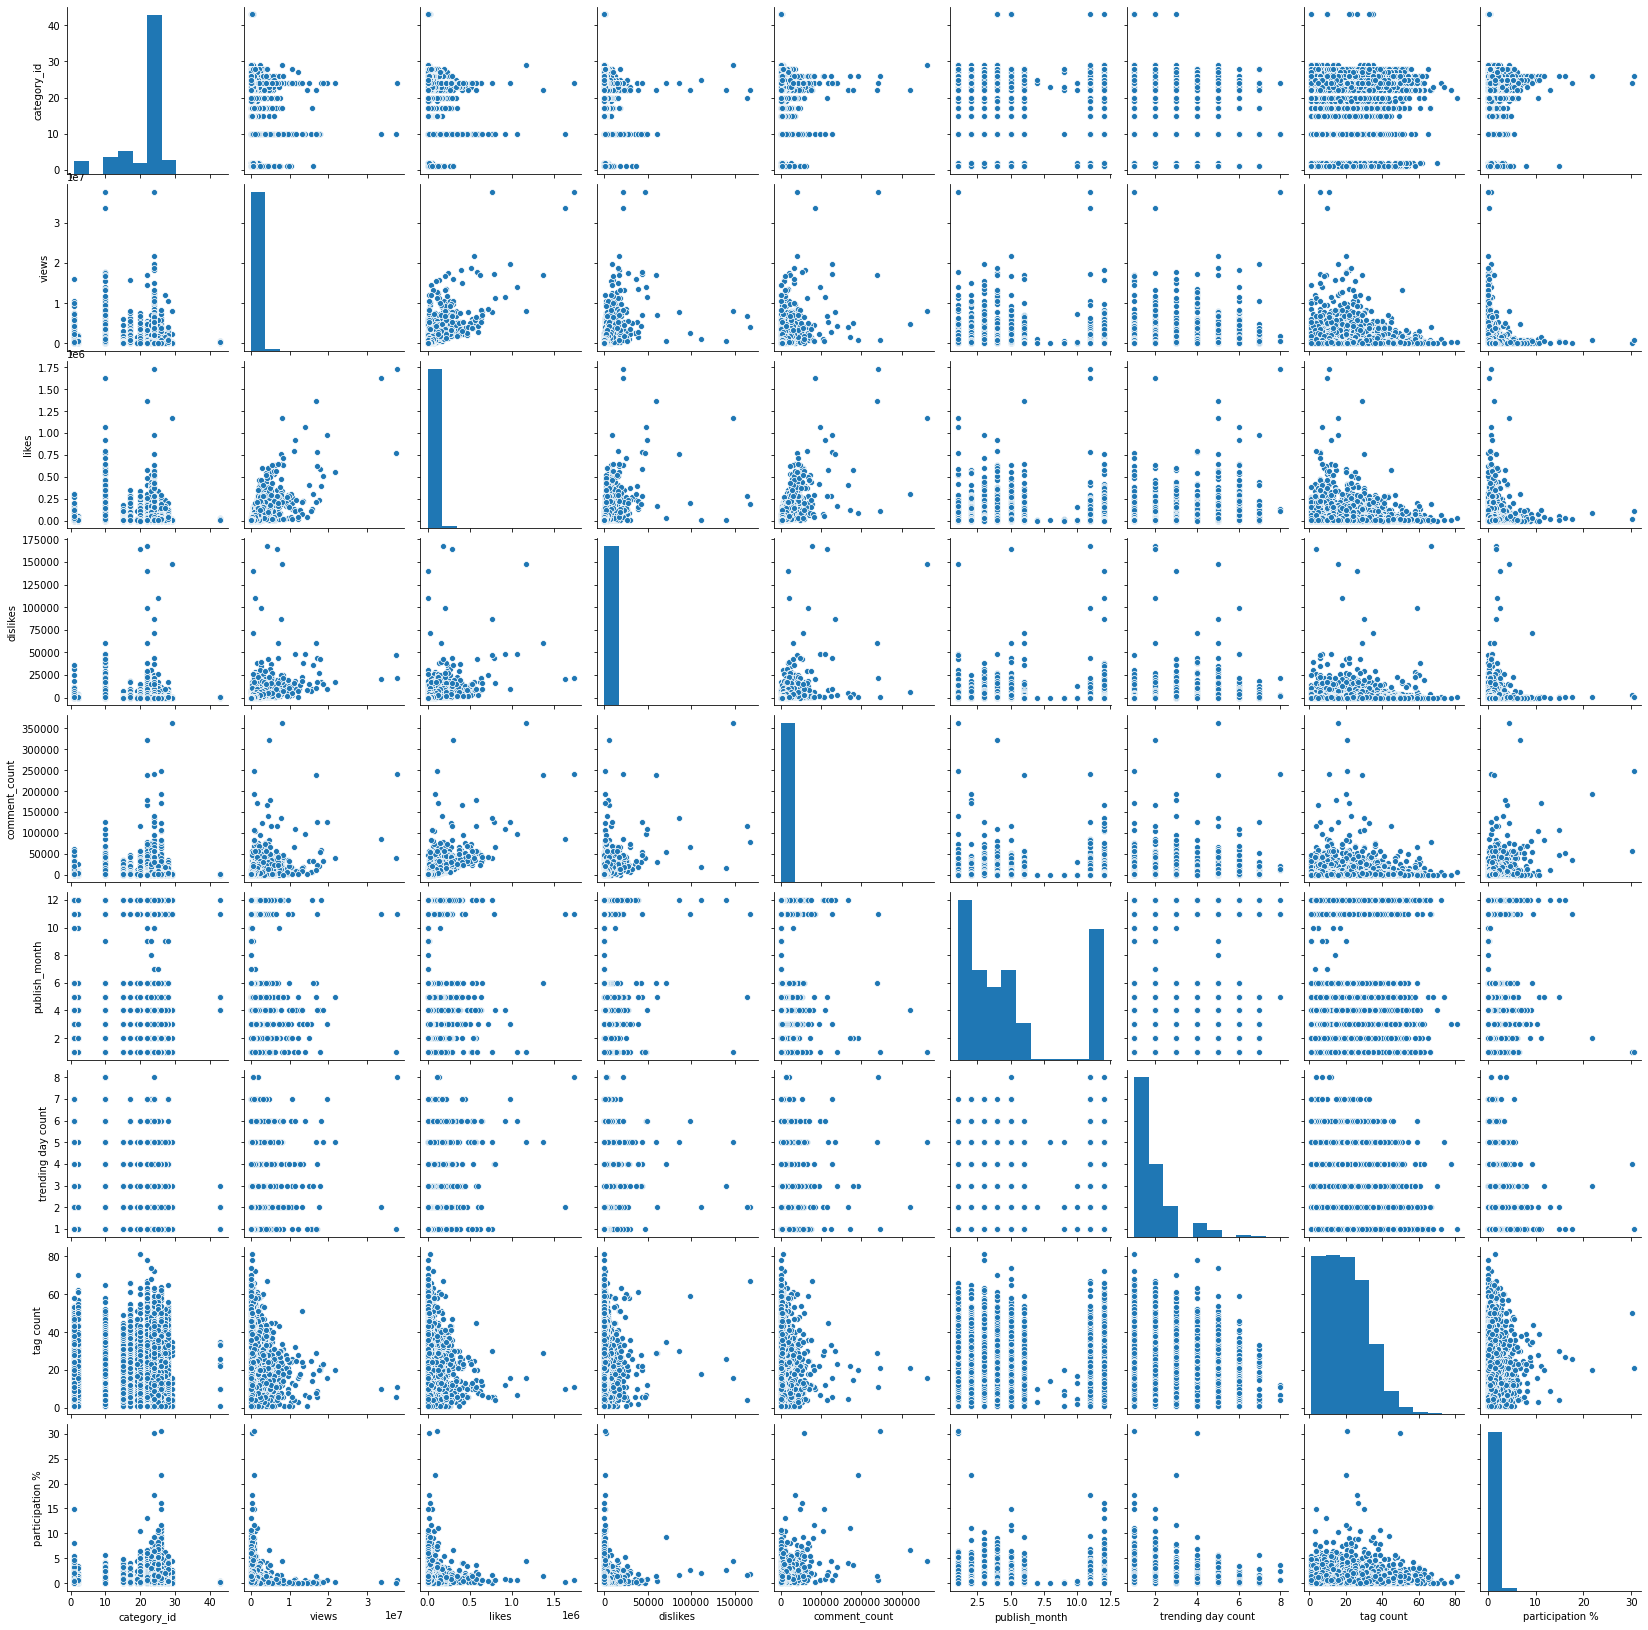

In [11]:
sns.pairplot(video_data)

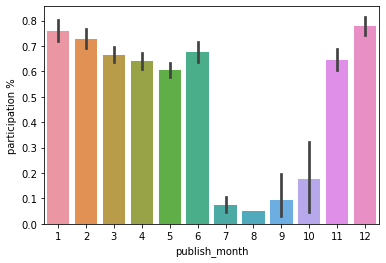

In [12]:
sns.barplot(data=video_data, x='publish_month', y='participation %')

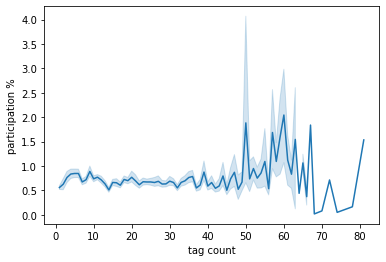

In [13]:
sns.lineplot(data=video_data, x='tag count', y='participation %')

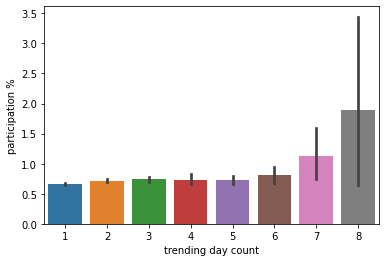

In [14]:
sns.barplot(data=video_data, x='trending day count', y='participation %')

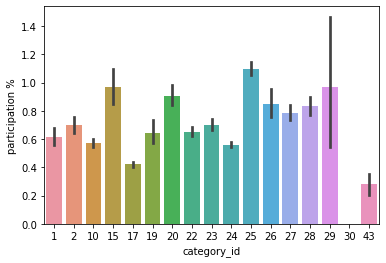

In [15]:
sns.barplot(data=video_data, x='category_id', y='participation %')

In [16]:
video_data['participation %'].describe()

count    18760.000000
mean         0.688439
std          0.895904
min          0.000028
25%          0.201257
50%          0.460685
75%          0.861173
max         30.460041
Name: participation %, dtype: float64

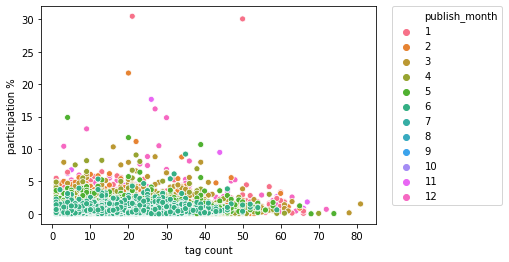

In [17]:


#video_data.loc['participation %'] = video_data.comment_count/video_data.likes

#video_data.plot.scatter(x='tag count', y='particpation %')

sns.scatterplot(data=video_data, x='tag count', y='participation %', hue='publish_month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Analyzing and finding most common tags.

In [18]:
tags = [item for sublist in video_data.tags.map(lambda x: [i.strip() for i in x.split('|')]).tolist() for item in sublist]

from collections import Counter

tag_count = Counter(tags)

tag_count.most_common(10)

[('funny', 1732),
 ('comedy', 1174),
 ('[none]', 1083),
 ('news', 779),
 ('politics', 598),
 ('2018', 528),
 ('review', 485),
 ('humor', 468),
 ('reaction', 459),
 ('video', 455)]

Set dummy variables for publish month and category id.<br>
Drop unused columns.

In [19]:
temp = pd.get_dummies(video_data, columns=['publish_month', 'category_id'])
temp = temp.drop(columns=['trending_date','title','channel_title','publish_time','tags','views','likes','dislikes','comment_count','description'])

X = temp.drop(columns=['participation %']).values
y = temp['participation %'].values 

<h1> Train / Test Model </h1>

Generate training and testing sets, 80/20 split.

In [20]:
from sklearn.model_selection import train_test_split as tts

train, test = tts(temp, test_size=0.2)

train_x, test_x, train_y, test_y = tts(X, y, test_size=0.2)

In [21]:
from sklearn.linear_model import LinearRegression

predictor = LinearRegression()
predictor.fit(X=train_x, y=train_y)

LinearRegression()

In [22]:
test_y_prediction = predictor.predict(X=test_x)
predictor.score(train_x, train_y)

0.05117859075928033

Check absolute error of results,

In [23]:
from sklearn import metrics

metrics.median_absolute_error(test_y, test_y_prediction)

0.3732942013742673

Check coefficient of determination.

In [24]:
predictor.score(test_x, test_y)

0.05966471707393817